In [16]:
import json
import glob
import re
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [17]:
# Set the default font to be LaTeX compliant.
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Computer Modern Roman"
plt.rcParams["text.usetex"] = True

# Set a global font size.
font_size = 11
plt.rcParams["font.size"] = font_size
plt.rcParams["axes.labelsize"] = font_size
plt.rcParams["xtick.labelsize"] = font_size
plt.rcParams["ytick.labelsize"] = font_size
plt.rcParams["legend.fontsize"] = 10

In [18]:
plot_colors = [
    "darkred",
    "darkgreen",
    "darkblue",
    "darkmagenta",
    "darkcyan",
    "magenta",
    "green",
    "goldenrod",
    "black",
    "orange",
    "purple"
]

In [19]:
data_dir = Path("data")
json_files = sorted(data_dir.glob("vqe-time-rel-noise-experement_5Q_*.json"))

# Load all JSONs into a list
data_list = []
for f in json_files:
    with open(f, "r") as file:
        data_list.append(json.load(file))

# Example: check first element
print(data_list[0])


{'config': {'run': 'vqe-bigT-simulation', 'bigT': [10, 20, 30, 40, 50], 'nqubits': 5, 'state': 'dmatrix', 'output': {'file_name_prefix': 'vqe-time-rel-noise-experement_5Q', 'draw': {'status': True, 'fig_dpi': 100, 'type': 'png'}}, 'observable': {'def': 'ising', 'coefficients': {'cn': [0.5, 0.5, 0.5, 0.5], 'bn': [1.0, 1.0, 1.0, 1.0, 1.0], 'r': 1}}, 'ansatz': {'layer': 30, 'gateset': 1, 'ugate': {'type': 'heisenberg', 'coefficients': {'cn': [0.5, 0.5, 0.5, 0.5], 'bn': [1.0, 1.0, 1.0, 1.0, 1.0], 'r': 0}, 'time': {'min': 0.0, 'max': 10}}}, 'vqe': {'iteration': 10, 'optimization': {'status': True, 'algorithm': 'SLSQP', 'constraint': True}}, 'init_param': {'value': 'random'}, 'noise_profile': {'status': False, 'type': 'dephasing', 'noise_prob': [0.001, 0.001, 0.0, 0.0], 'noise_on_init_param': {'status': False, 'value': 0}}, 'redundant': {'identity_factors': [[0, 0, 0, 0], [1, 1, 1, 1]]}, 'zne': {'method': 'richardson', 'degree': 1, 'sampling': 'default', 'data_points': None}}, 'output': {'ex

In [20]:
EXACT_SOLUTION: float = -6.026674183332271

In [21]:
data_analysis = []
for data in data_list:
    temp_cost_list = data["output"]["optimized_minimum_cost"]
    t_max = data["config"]["ansatz"]["ugate"]["time"]["max"]
    cost_mean = np.mean(temp_cost_list)
    cost_std = np.std(temp_cost_list)
    data_analysis.append([[cost_mean, cost_std], t_max])

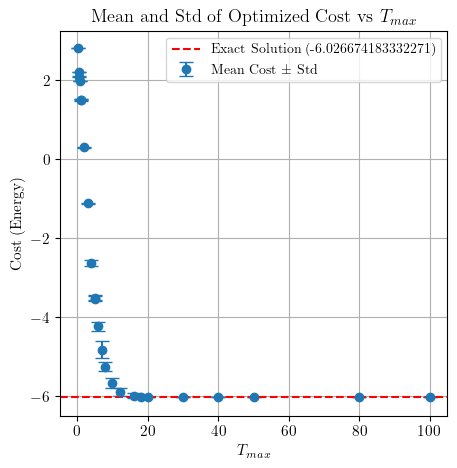

In [23]:
# Extract data for plotting
t_values = [item[1] for item in data_analysis]           # t_max values on x-axis
cost_means = [item[0][0] for item in data_analysis]      # mean cost
cost_stds = [item[0][1] for item in data_analysis]       # std cost

# Plot mean with std as error bars (points only, no connecting line)
plt.figure(figsize=(5,5))
plt.errorbar(t_values, cost_means, yerr=cost_stds, fmt='o', capsize=5, label='Mean Cost ± Std')

# Plot exact solution as a horizontal line
plt.axhline(y=EXACT_SOLUTION, color='red', linestyle='--', label=f'Exact Solution ({EXACT_SOLUTION})')

# Labels and title
plt.xlabel('$T_{max}$')
plt.ylabel('Cost (Energy)')
plt.title('Mean and Std of Optimized Cost vs $T_{max}$')
plt.grid(True)
plt.legend()
plt.show()


In [6]:
A = [
                0.17107150037194677,
                0.17107150037194677,
                0.8054395138541163,
                0.8054395138541163,
                1.7863359370823253,
                2.2208541066448335,
                2.640785757535377,
                3.1343913779747474,
                3.601414958537411,
                3.6014149585374113,
                3.9417865087945065,
                4.363582613347555,
                4.85504860461994,
                5.308773901729808,
                5.308773901729808,
                5.308773901729808,
                5.894983214550933,
                5.894983214550933,
                5.941338453009839,
                6.665550982404731,
                7.053970018212345,
                7.053970018212345,
                7.554674023748785,
                7.554674023748785,
                8.100940520937149,
                8.34291645721693,
                8.343687267378277,
                9.531997224922154,
                9.531997224922154,
                10.0,
                9.47270561410355,
                0.9211933857174878,
                -3.8112277419644283,
                -1.2737161403897996,
                -2.152293958582357,
                0.10596773587185045,
                -2.7530195095926238,
                -0.6736998095022602,
                1.6957599794561526,
                -0.6380729383576144,
                0.7046386412474431,
                0.8693407537543996,
                0.9530509518713823,
                0.2339860104884949,
                0.3472887212549974,
                0.7876176586762751,
                0.9969376374648237,
                -1.0798853249678564,
                0.9588996043349843,
                -2.0380760113407925,
                -0.49882200596876314,
                1.2495400538675299,
                -1.0772745845338065,
                1.382433895890596,
                -1.277690681006603,
                0.05916576505723607,
                -1.7453223424498951,
                -2.534071204590196,
                -1.0755377129788959,
                -2.0168902964009234,
                -2.0225394369094873,
                -1.5306740112580701,
                0.4665886722789441,
                -1.7085914738332069,
                0.4436855310108449,
                -0.225724212395613,
                1.5187021369511455,
                0.13754795250199733,
                0.8559649068170666,
                0.3352894984547341,
                2.160149950545603,
                -0.8069865737041079,
                -1.0976032909692037,
                1.014852704003832,
                1.1629252703256996,
                0.8524130609810912,
                -1.1865880925306471,
                -0.15808456045304725,
                0.9045194725755904,
                -1.8234540107425294,
                0.750168419565639,
                0.8178244866547575,
                0.7156463280522182,
                -0.5055897414382515,
                2.5656708542302598,
                -0.714528441307977,
                1.2579701107387027,
                1.9991122116553253,
                0.5124117562386797,
                -2.065115350474171,
                0.030270232466665183
            ]
len(A)

91

In [8]:
B = [
                    0.031348649441145314,
                    0.07549636193060837,
                    0.04256532679380046,
                    0.09153277362232427,
                    0.032280516703777455,
                    0.0014311846357958236,
                    0.09458586087346615,
                    0.08507221455365939,
                    0.03886728045985032,
                    0.05532605954735771,
                    0.04046639967119381,
                    0.04968874543432177,
                    0.013178453156392933,
                    0.05132865042431615,
                    0.015480269254450375,
                    0.06934188000580536,
                    0.08528691789556875,
                    0.06980186053964492,
                    0.03392433315204867,
                    0.026234117908802958,
                    0.07234021048447048,
                    0.021173984986104136,
                    0.048608775860572745,
                    0.09439648549909074,
                    0.0960281258028588,
                    0.06960946663965849,
                    0.04319874336343446,
                    0.08322693833491177,
                    0.02951195925979412,
                    0.0032965224375144154,
                    0.08823668545166474,
                    3.290424330086861e-05,
                    0.01392273911280122,
                    0.047817054295653375,
                    0.012471718511174068,
                    0.025981617425650794,
                    0.011657515847949175,
                    0.001248281529584161,
                    0.05718917880359836,
                    0.04274755907378062,
                    0.05658369731112304,
                    0.0853892757525431,
                    0.07935353380979254,
                    0.06942757262787438,
                    0.02227431603282959,
                    0.0014855434055259021,
                    0.060602508920113686,
                    0.008411151223418045,
                    0.05579340790660499,
                    0.03304626846228449,
                    0.05998018114905251,
                    0.00317064060747434,
                    0.08335910731907593,
                    0.08095988723729965,
                    0.07944310321124705,
                    0.08468013654099166,
                    0.07950305028940695,
                    0.03138388685826491,
                    0.025677324311801055,
                    0.0073932697883708045
                ]
len(B)


60